### Load The Dataset and Apply Preprocessing

In [43]:
import os
import cv2
import matplotlib.pyplot as plt

DATADIR = "102 flower/flowers"
CATEGORIES = ["train", "valid", "test"]

train_img = []
valid_img = []
test_img = []
train_labels = []
valid_labels = []
test_labels = []

# iterate through each category (train, valid, test)
for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for folder_name in os.listdir(path): # iterate through each folder (class) in the current category
        folder_path = os.path.join(path, folder_name)
        if os.path.isdir(folder_path):
            for image_name in os.listdir(folder_path):
                img_path = os.path.join(folder_path, image_name)
                img = cv2.imread(img_path, cv2.IMREAD_COLOR)
                if img is not None:
                    if category == "train":
                        train_img.append(img)
                        train_labels.append(folder_name)
                    elif category == "valid":
                        valid_img.append(img)
                        valid_labels.append(folder_name)
                    elif category == "test":
                        test_img.append(img)
                        test_labels.append(folder_name)

In [2]:
def show_image(img):
    plt.imshow(img, cmap="gray")
    plt.axis("off")
    plt.show()

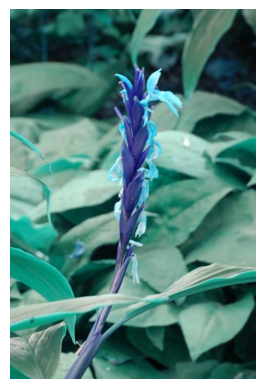

In [3]:
show_image(train_img[0])

In [4]:
import json

with open('102 flower/cat_to_name.json') as f:
    class_names = json.load(f)

def get_label_name(label):
    return class_names[str(label)]

In [5]:
get_label_name(train_labels[0])

'cautleya spicata'

In [44]:
print(f"Train size: {len(train_img)}")
print(f"Valid size: {len(valid_img)}")
print(f"Test size: {len(test_img)}")

Train size: 6552
Valid size: 818
Test size: 819


In [45]:
import numpy as np

IMG_SIZE = 224 
def preprocess(images):
    processed_images = []
    for image in images:
        resized_img = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
        normalized_img = resized_img / 255.0
        processed_images.append(normalized_img)
    return processed_images


train_img = preprocess(train_img)
valid_img = preprocess(valid_img)
test_img = preprocess(test_img)

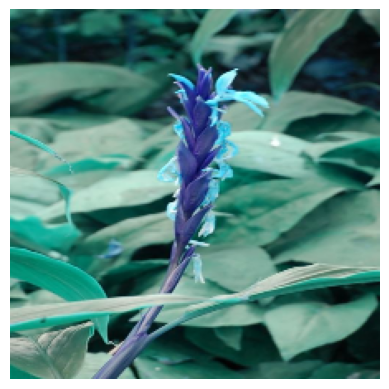

In [8]:
show_image(train_img[0])

### My Custom CNN Model

In [9]:
import tensorflow as tf
from functools import partial

DefaultConv2D = partial(
    tf.keras.layers.Conv2D, kernel_size=3, padding="same", activation="relu", kernel_initializer="he_normal"
)

my_custom_cnn_model = tf.keras.Sequential([
    DefaultConv2D(filters=64, kernel_size=7, input_shape=[IMG_SIZE, IMG_SIZE, 3]),
    tf.keras.layers.MaxPool2D(),
    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    tf.keras.layers.MaxPool2D(),
    DefaultConv2D(filters=256),
    DefaultConv2D(filters=256),
    tf.keras.layers.MaxPool2D(),
    DefaultConv2D(filters=512),
    DefaultConv2D(filters=512),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=128, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=64, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=102, activation="softmax")
])

my_custom_cnn_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

my_custom_cnn_model.summary()

/Users/macbook/Downloads/jupyter_env/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 64)   │         9,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    12,845,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 102)            │         6,630 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,532,710 (66.88 MB)

 Trainable params: 17,532,710 (66.88 MB)

 Non-trainable params: 0 (0.00 B)

In [46]:
# convert train_img and valid_img from lists to numpy arrays
train_img = np.array(train_img)
valid_img = np.array(valid_img)
test_img = np.array(test_img)

# print shapes to verify
print("Train images shape:", train_img.shape)
print("Valid images shape:", valid_img.shape)
print("Test images shape:", test_img.shape)

Train images shape: (6552, 224, 224, 3)
Valid images shape: (818, 224, 224, 3)
Test images shape: (819, 224, 224, 3)


In [47]:
# Convert labels to integers and adjust out-of-range values
train_labels = [int(label) if 0 <= int(label) < 102 else 0 for label in train_labels]
valid_labels = [int(label) if 0 <= int(label) < 102 else 0 for label in valid_labels]
test_labels = [int(label) if 0 <= int(label) < 102 else 0 for label in test_labels]

In [12]:
NUM_EPOCHS = 5
history = my_custom_cnn_model.fit(
    train_img,
    np.array(train_labels),
    epochs=NUM_EPOCHS,
    validation_data=(valid_img, np.array(valid_labels))
)

Epoch 1/5
205/205 ━━━━━━━━━━━━━━━━━━━━ 1660s 8s/step - accuracy: 0.0259 - loss: 6.3631 - val_accuracy: 0.0342 - val_loss: 4.5733
Epoch 2/5
205/205 ━━━━━━━━━━━━━━━━━━━━ 1515s 7s/step - accuracy: 0.0331 - loss: 4.5671 - val_accuracy: 0.0257 - val_loss: 4.5197
Epoch 3/5
205/205 ━━━━━━━━━━━━━━━━━━━━ 1551s 8s/step - accuracy: 0.0294 - loss: 4.5291 - val_accuracy: 0.0257 - val_loss: 4.5054
Epoch 4/5
205/205 ━━━━━━━━━━━━━━━━━━━━ 1576s 8s/step - accuracy: 0.0279 - loss: 4.5294 - val_accuracy: 0.0257 - val_loss: 4.5013
Epoch 5/5
205/205 ━━━━━━━━━━━━━━━━━━━━ 1577s 8s/step - accuracy: 0.0309 - loss: 4.5220 - val_accuracy: 0.0342 - val_loss: 4.5016


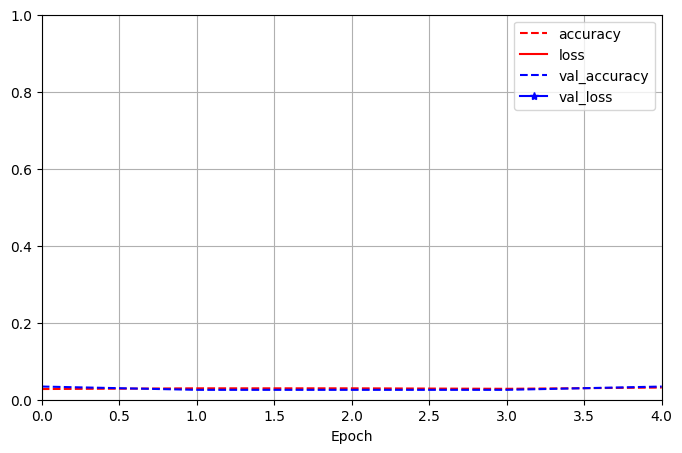

In [13]:
import pandas as pd

pd.DataFrame(history.history).plot(
    figsize = (8,5), xlim=[0,4], ylim=[0,1], grid=True, xlabel="Epoch",
    style=["r--", "r-", "b--", "b-*"]
)
plt.show()

### Using Transfer Learning for Classification

In [14]:
from keras.applications import Xception
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

weights_path = 'xception_weights_tf_dim_ordering_tf_kernels_notop.h5'
base_model = Xception(weights=weights_path, include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))

avg = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
output = tf.keras.layers.Dense(102, activation="softmax")(avg)
pretrained_model = tf.keras.Model(inputs=base_model.input, outputs=output)

pretrained_model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1        │ (None, 111, 111,  │        864 │ input_layer_1[0]… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_bn     │ (None, 111, 111,  │        128 │ block1_conv1[0][… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_act    │ (None, 111, 111,  │          0 │ block1_conv1_bn[… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2        │ (None, 109, 109,  │     18,432 │ block1_conv1_act… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_bn     │ (None, 109, 109,  │        256 │ block1_conv2[0][… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_act    │ (None, 109, 109,  │          0 │ block1_conv2_bn[… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1     │ (None, 109, 109,  │      8,768 │ block1_conv2_act… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1_bn  │ (None, 109, 109,  │        512 │ block2_sepconv1[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_act │ (None, 109, 109,  │          0 │ block2_sepconv1_… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2     │ (None, 109, 109,  │     17,536 │ block2_sepconv2_… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_bn  │ (None, 109, 109,  │        512 │ block2_sepconv2[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 55, 55,    │      8,192 │ block1_conv2_act… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_pool         │ (None, 55, 55,    │          0 │ block2_sepconv2_… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 55, 55,    │        512 │ conv2d_7[0][0]    │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 55, 55,    │          0 │ block2_pool[0][0… │
│                     │ 128)              │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_sepconv1_act │ (None, 55, 55,    │          0 │ add[0][0]       

 Total params: 21,070,478 (80.38 MB)

 Trainable params: 21,015,950 (80.17 MB)

 Non-trainable params: 54,528 (213.00 KB)

In [16]:
for layer in base_model.layers:
    layer.trainable = False

pretrained_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = pretrained_model.fit(
    train_img,
    np.array(train_labels),
    epochs=3,
    validation_data=(valid_img, np.array(valid_labels))
)

Epoch 1/3
205/205 ━━━━━━━━━━━━━━━━━━━━ 310s 2s/step - accuracy: 0.3330 - loss: 3.1969 - val_accuracy: 0.7103 - val_loss: 1.3513
Epoch 2/3
205/205 ━━━━━━━━━━━━━━━━━━━━ 307s 1s/step - accuracy: 0.8008 - loss: 1.0162 - val_accuracy: 0.7763 - val_loss: 0.9639
Epoch 3/3
205/205 ━━━━━━━━━━━━━━━━━━━━ 302s 1s/step - accuracy: 0.8805 - loss: 0.6361 - val_accuracy: 0.7995 - val_loss: 0.8062


In [17]:
for layer in base_model.layers[56:]:
    layer.trainable = True

pretrained_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = pretrained_model.fit(
    train_img,
    np.array(train_labels),
    epochs=2,
    validation_data=(valid_img, np.array(valid_labels))
)

Epoch 1/2
205/205 ━━━━━━━━━━━━━━━━━━━━ 707s 3s/step - accuracy: 0.7799 - loss: 0.8418 - val_accuracy: 0.8325 - val_loss: 0.6424
Epoch 2/2
205/205 ━━━━━━━━━━━━━━━━━━━━ 702s 3s/step - accuracy: 0.9603 - loss: 0.1432 - val_accuracy: 0.8570 - val_loss: 0.5734


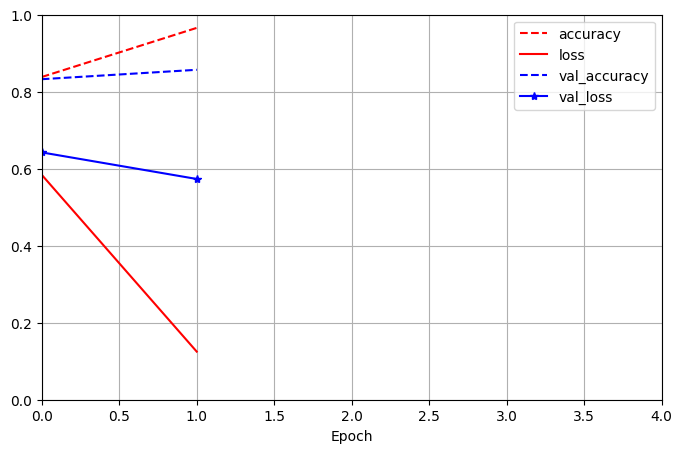

In [18]:
pd.DataFrame(history.history).plot(
    figsize = (8,5), xlim=[0,4], ylim=[0,1], grid=True, xlabel="Epoch",
    style=["r--", "r-", "b--", "b-*"]
)
plt.show()

### Comapare Both Models with Test Data

In [68]:
from sklearn.metrics import f1_score, accuracy_score

def get_evaluation_results(clf):
    y_pred_probs = clf.predict(test_img)
    y_pred = np.argmax(y_pred_probs, axis=1)  # convert probabilities to class labels

    f1 = f1_score(test_labels, y_pred, average='weighted')
    acc = accuracy_score(test_labels, y_pred)

    return f1, acc

In [69]:
results_custom_cnn = get_evaluation_results(my_custom_cnn_model)
results_pretrained = get_evaluation_results(pretrained_model)

26/26 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step
26/26 ━━━━━━━━━━━━━━━━━━━━ 24s 924ms/step


In [88]:
def plot_comparison(results):
    models = list(results.keys())
    accuracies = [results[model]['accuracy'] for model in models]
    f1_scores = [results[model]['f1_score'] for model in models]
    
    fig, ax = plt.subplots(figsize=(5, 3))
    bar_width = 0.4
    index = np.arange(len(models))
    
    colors = ['seagreen', 'lightseagreen']
    
    rects1 = ax.bar(index, accuracies, width=bar_width, label='Accuracy', color=colors[0])
    rects2 = ax.bar(index + bar_width, f1_scores, width=bar_width, label='F1-score', color=colors[1])
    
    ax.set_xlabel('Models')
    ax.set_ylabel('Scores')
    ax.set_title('Comparison of Model Performance')
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(models)
    ax.legend()

    plt.style.use('ggplot')
    plt.tight_layout()
    plt.show()

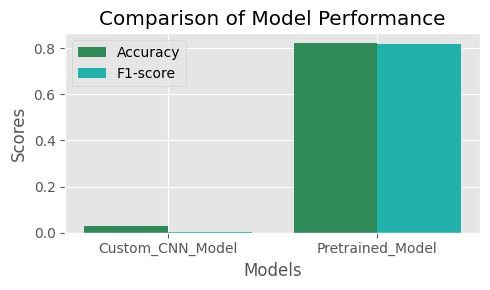

In [89]:
results = {
    'Custom_CNN_Model': {'accuracy': results_custom_cnn[1], 'f1_score': results_custom_cnn[0]},
    'Pretrained_Model': {'accuracy': results_pretrained[1], 'f1_score': results_pretrained[0]},
}

plot_comparison(results)